- Nama : Dia Kurnia Dewi
- Batch : 6
- Assignment :Milestone 2 

# Objective

Objective pada tugas ini adalah menklasifikasikan apakah seorang karyawan dengan karakteristik tertentu berdasarkan data apakah cenderung `Attrition` atau tidak. `Attrition` sendiri adalah kondisi dimana karyawan akan meninggalkan perusahaan dengan berbagai alasan seperti resign, pensiun dan lain sebagainya. 
Pada tugas ini dataset yang digunakan berasal dari Kaggle dengan judul `IBM HR Analytics Employee Attrition & Performance`, berikut adalah link dari dataset yang dignakan https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.

# Data Understanding

Education :</br>
1 'Below College', </br>
2 'College',  </br>
3 'Bachelor',  </br>
4 'Master', </br>
5 'Doctor' </br>

EnvironmentSatisfaction :
1 'Low', </br>
2 'Medium', </br>
3 'High', </br>
4 'Very High' </br>

JobInvolvement :
1 'Low', </br>
2 'Medium', </br>
3 'High',</br>
4 'Very High'</br>

JobSatisfaction :</br>
1 'Low',</br>
2 'Medium',</br>
3 'High',</br>
4 'Very High'</br>

PerformanceRating :</br>
1 'Low',</br>
2 'Good',</br>
3 'Excellent',</br>
4 'Outstanding'</br>

RelationshipSatisfaction :</br>
1 'Low',</br>
2 'Medium',</br>
3 'High',</br>
4 'Very High'</br>

WorkLifeBalance :</br>
1 'Bad',</br>
2 'Good',</br>
3 'Better',</br>
4 'Best'</br>

# Import Library

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import matplotlib.ticker as mtick 

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn import tree
from jcopml.feature_importance import mean_loss_decrease, mean_score_decrease

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import pickle
import joblib

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [4]:
df = pd.read_csv('attrition.csv')

# Data Exploration

In [193]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset terdiri dari `1470` baris dan `34` kolom dengan kolom target `Attrition`, sebagain besar kolom memiliki tipe data numerik.

In [195]:
df.select_dtypes(['int','float']).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- Feature `StandardHours` dan `EmployeeCount` hanya memiliki satu unique value, oleh karena itu kedua kolom tersebut akan di drop.
- Rata-rata usia dari pegawai `37` dan yang tertua berusia `60` tahun.
- `EmployeNumber` merupakan id dari pegawai dan kesemua value nya unique, nantinya kolom ini juga akan di drop.

In [196]:
df.select_dtypes(object).describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


- Sebagain besar pegawai berasal dari departemen `Research & Development`, memiliki job role `Sales Executive` dan ber-gender `Male`.
- Keseluruhan pegawai berusia lebih dari 18 tahun dan pada kolom `Over18` hanya terdapat satu unique value, sehingga kolom ini nantinya akan di drop.

# Data Cleaning

### Handling Missing Value

In [197]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Tidak ditemukan adanya missing value pada dataset.

### Handling Duplicated Data

In [198]:
df.duplicated().sum()

0

Pada dataset tidak terdapat duplikasi data.

# Exploratory Data Analysis (EDA)

## Analysis numerical Feature

### Univariate Analysis

In [199]:
nums = df.select_dtypes(['int','float']).columns.tolist()

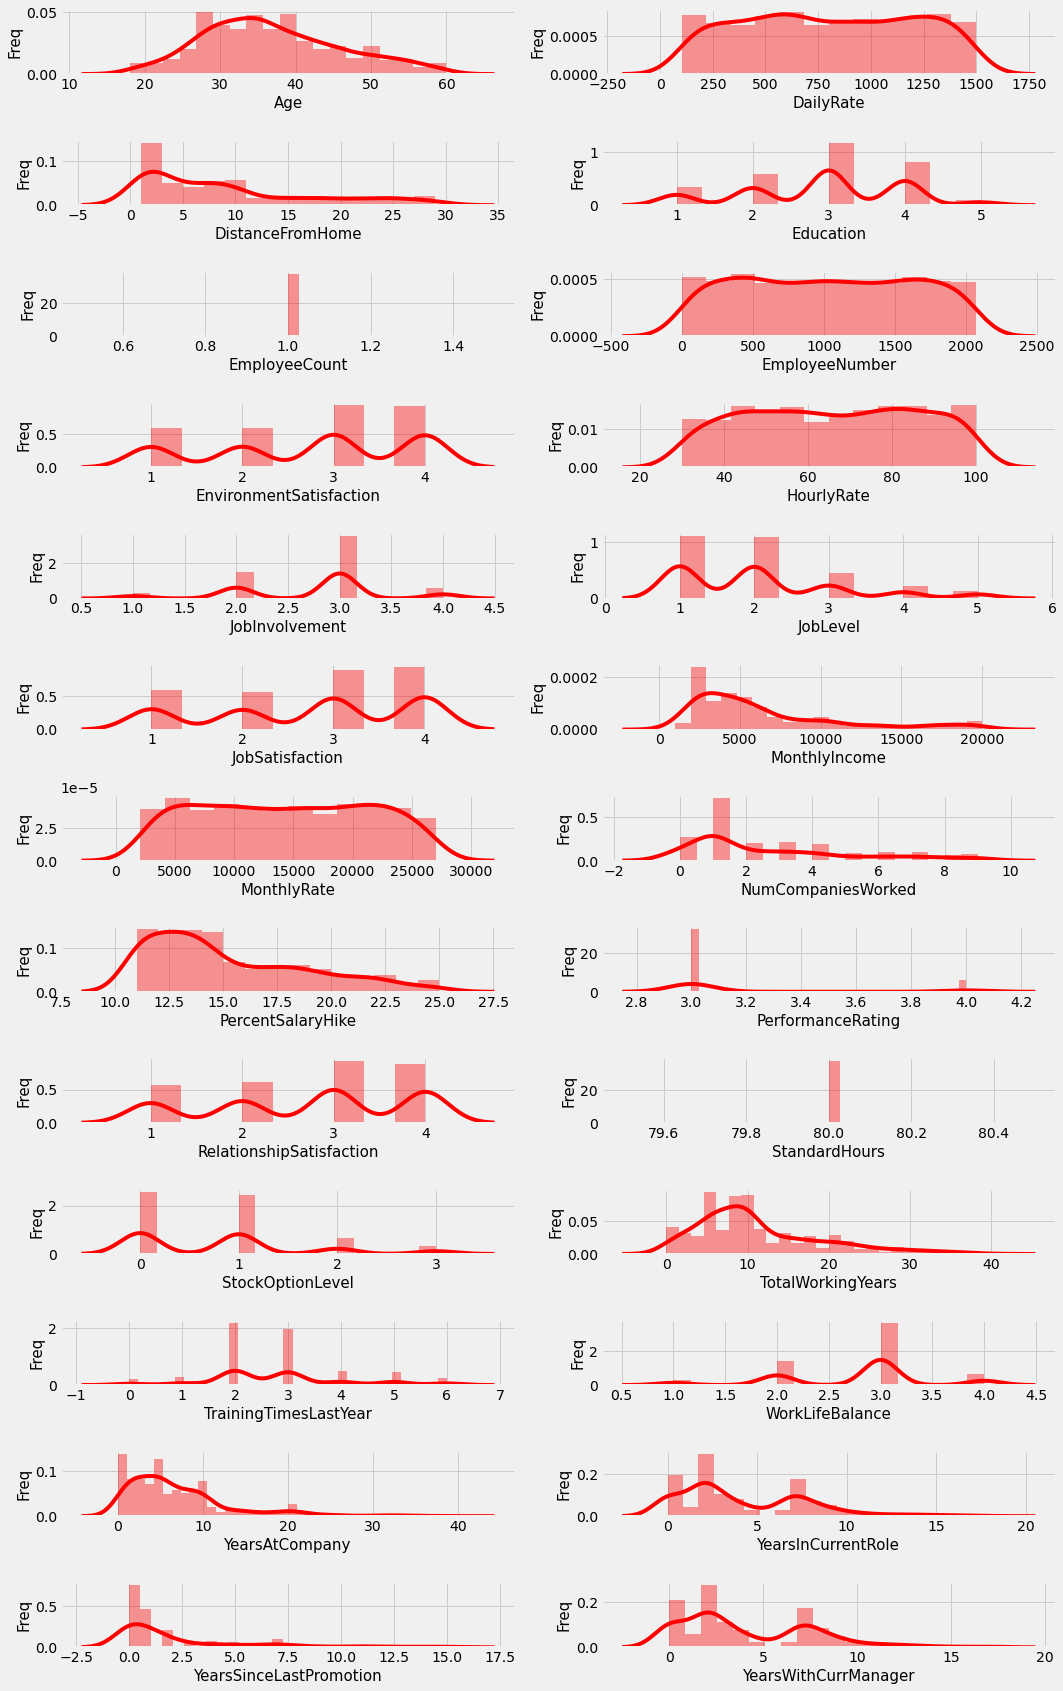

In [200]:
plt.figure(figsize=(15, 25))
for i in range(len(nums)):
    plt.subplot(len(nums)//2+1, 2, i+1)
    ax = sns.distplot( df[nums[i]], color = 'red')
    ax.set_xlabel(nums[i], fontsize = 15)
    ax.set_ylabel("Freq", fontsize = 15)
plt.tight_layout()
plt.show()

Pada beberapa kolom terlihat tidak terdistribusi normal, seperti pada kolom `MonthlyIncome`, `DistanceFromHome` dan `YearSinceLastPromosion`.

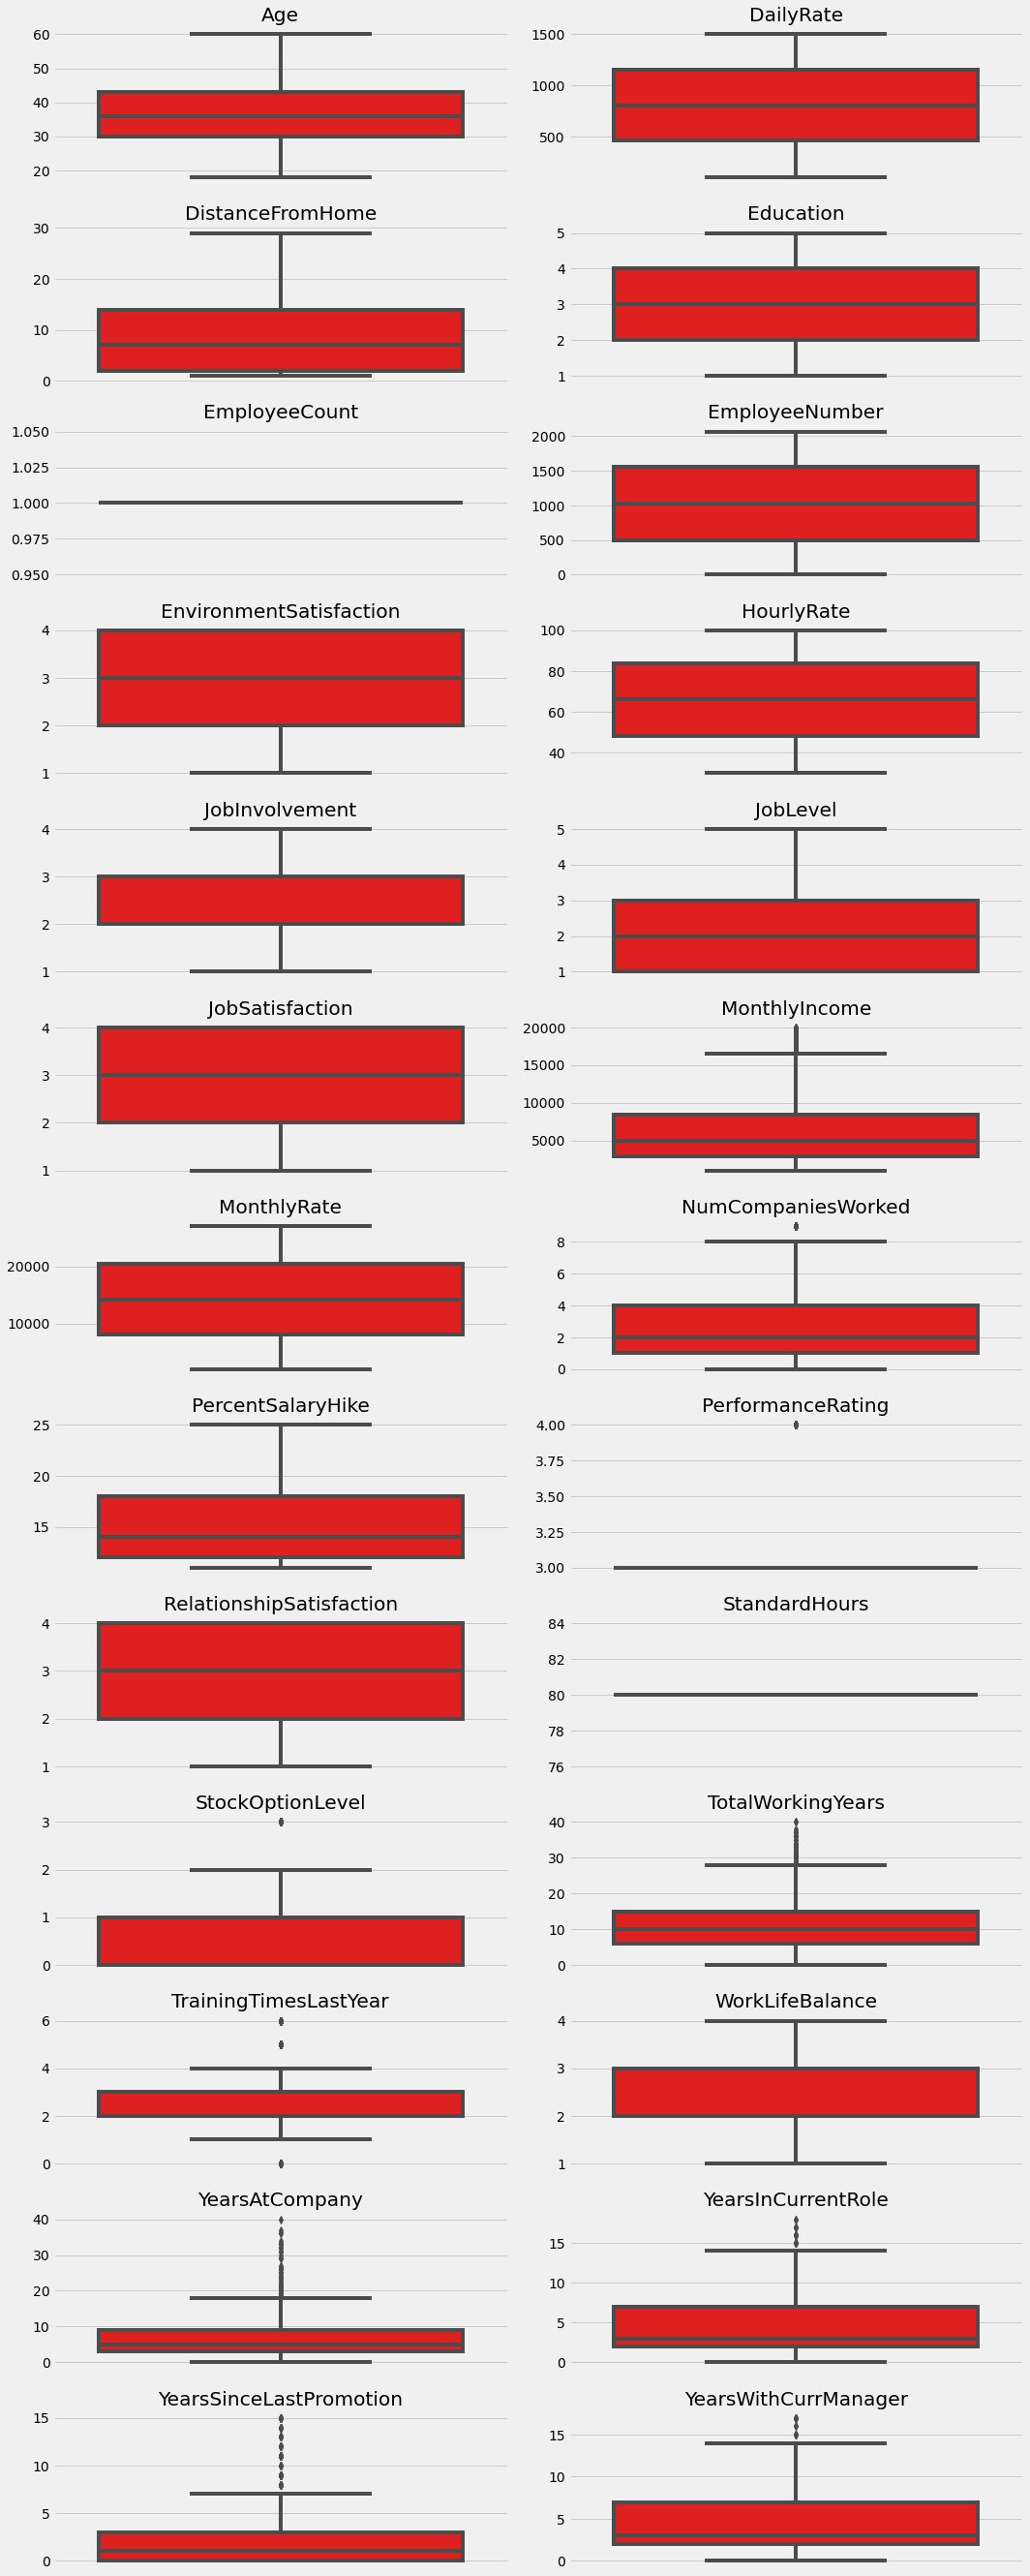

In [201]:
plt.figure(figsize=(15, 40))
for i in range(len(nums)):
    plt.subplot(len(nums)//2+1, 2, i+1)
    ax = sns.boxplot(
        y = df[nums[i]],
        color = 'red'
    )
    ax.set_ylabel('')
    ax.set_title(nums[i])
plt.tight_layout()
plt.show()

Terlihat adanya outlier pada beberapa kolom seperti pada kolom `YearsSinceLastPromosion`, `YearsWithCurrManager` dan `YearsInCurrentRole`.

### Bivariate Analysis

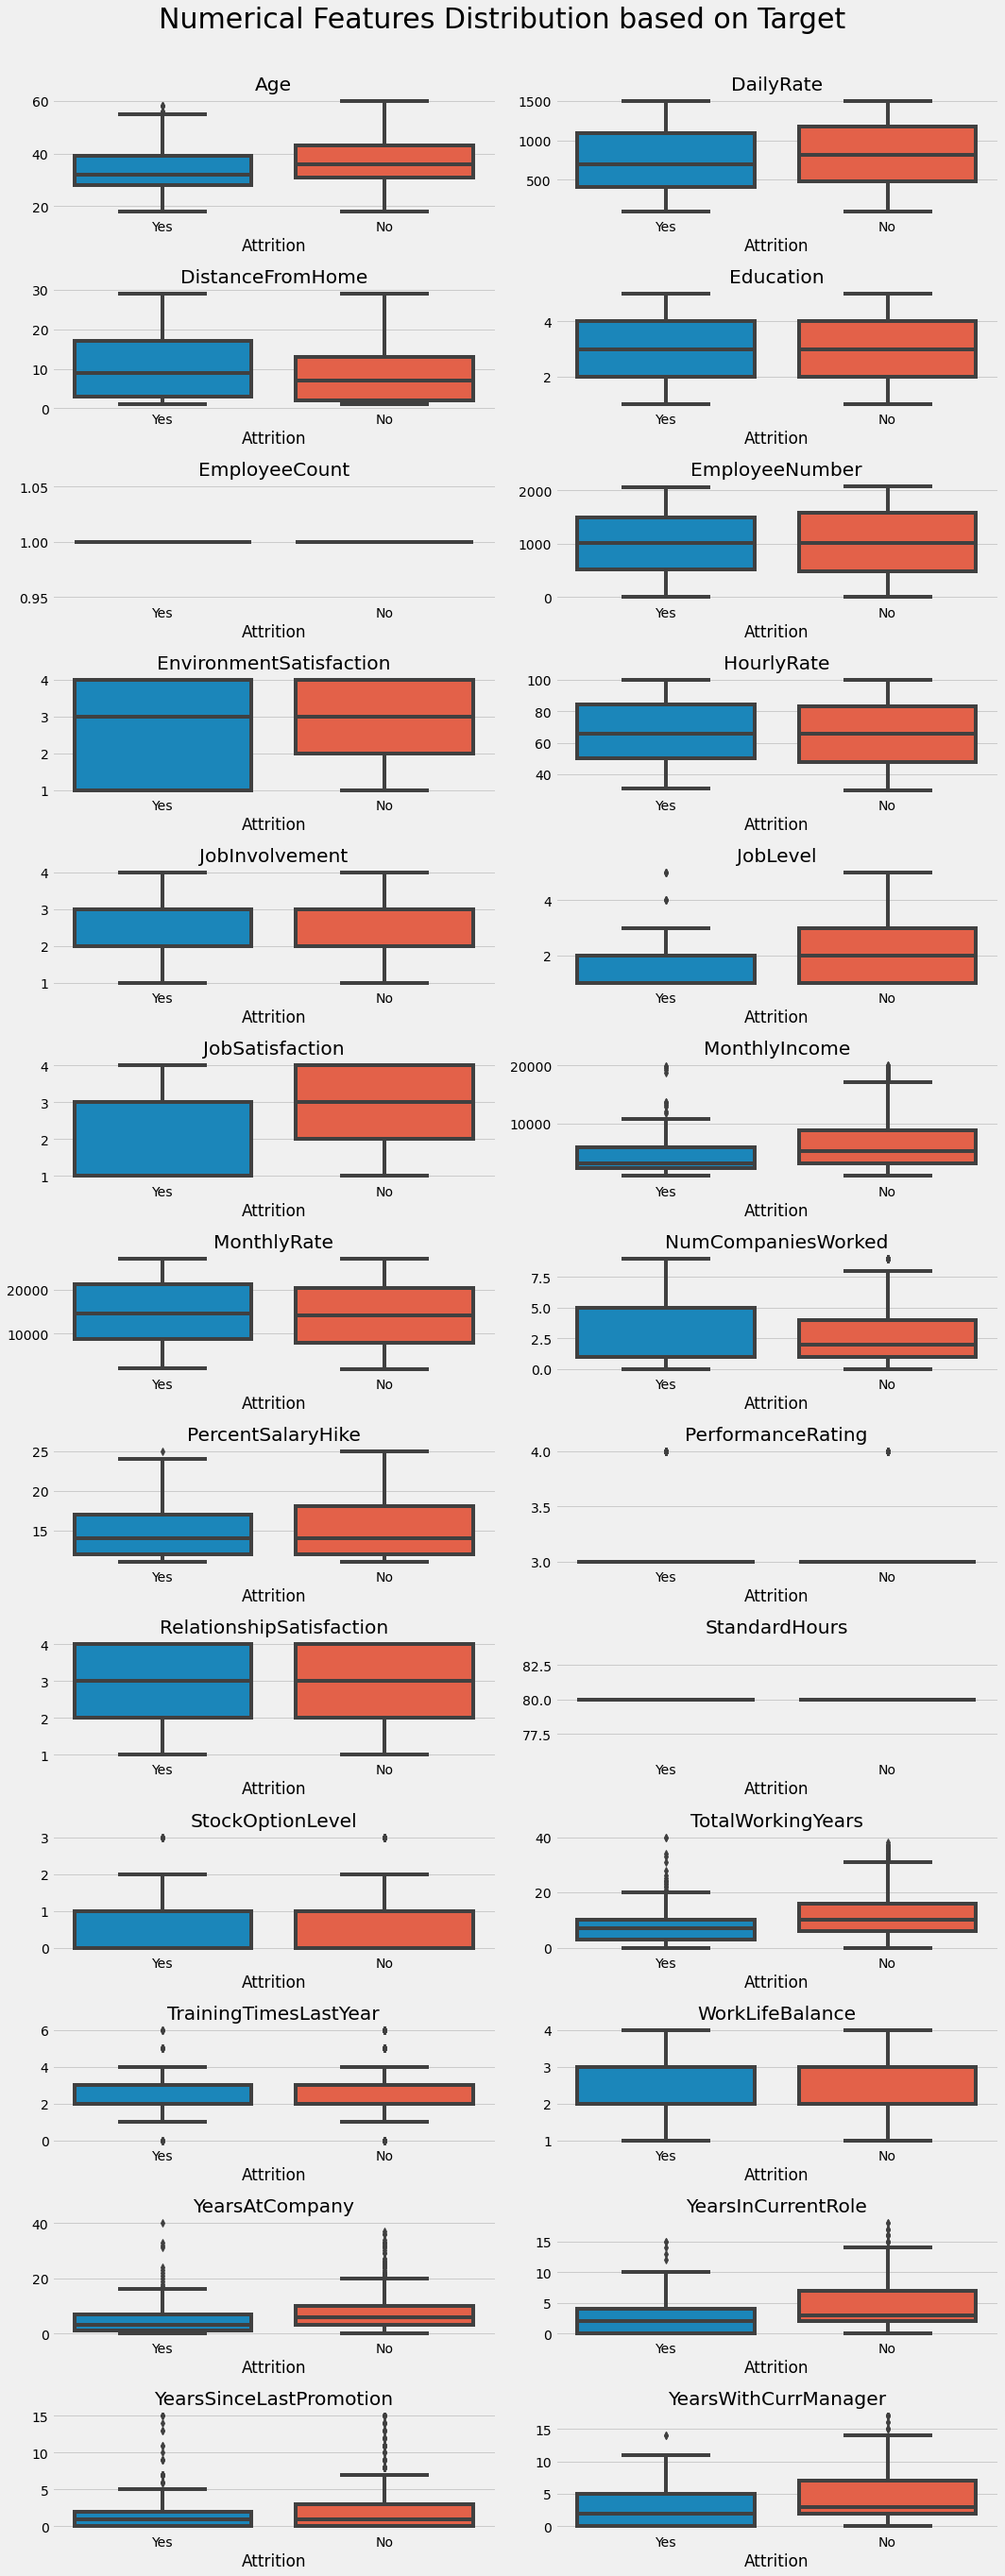

In [202]:
plt.figure(figsize=(15, 40))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(nums)):
    plt.subplot(len(nums)//2+1, 2, i+1)
    ax = sns.boxplot(
        y = df[nums[i]],
        x = df['Attrition'],
#         palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(nums[i])
plt.tight_layout()
plt.show()

- Berdaarkan usia,pegawai yang attrition memiliki median usia yang lebih rendah dari yang non attrition.
- Pegawai yang tidak attrition memiliki median `monthlyIncome` yang lebih tinggi dari pada yang attrition.

### Multivariate Analysis

In [203]:
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

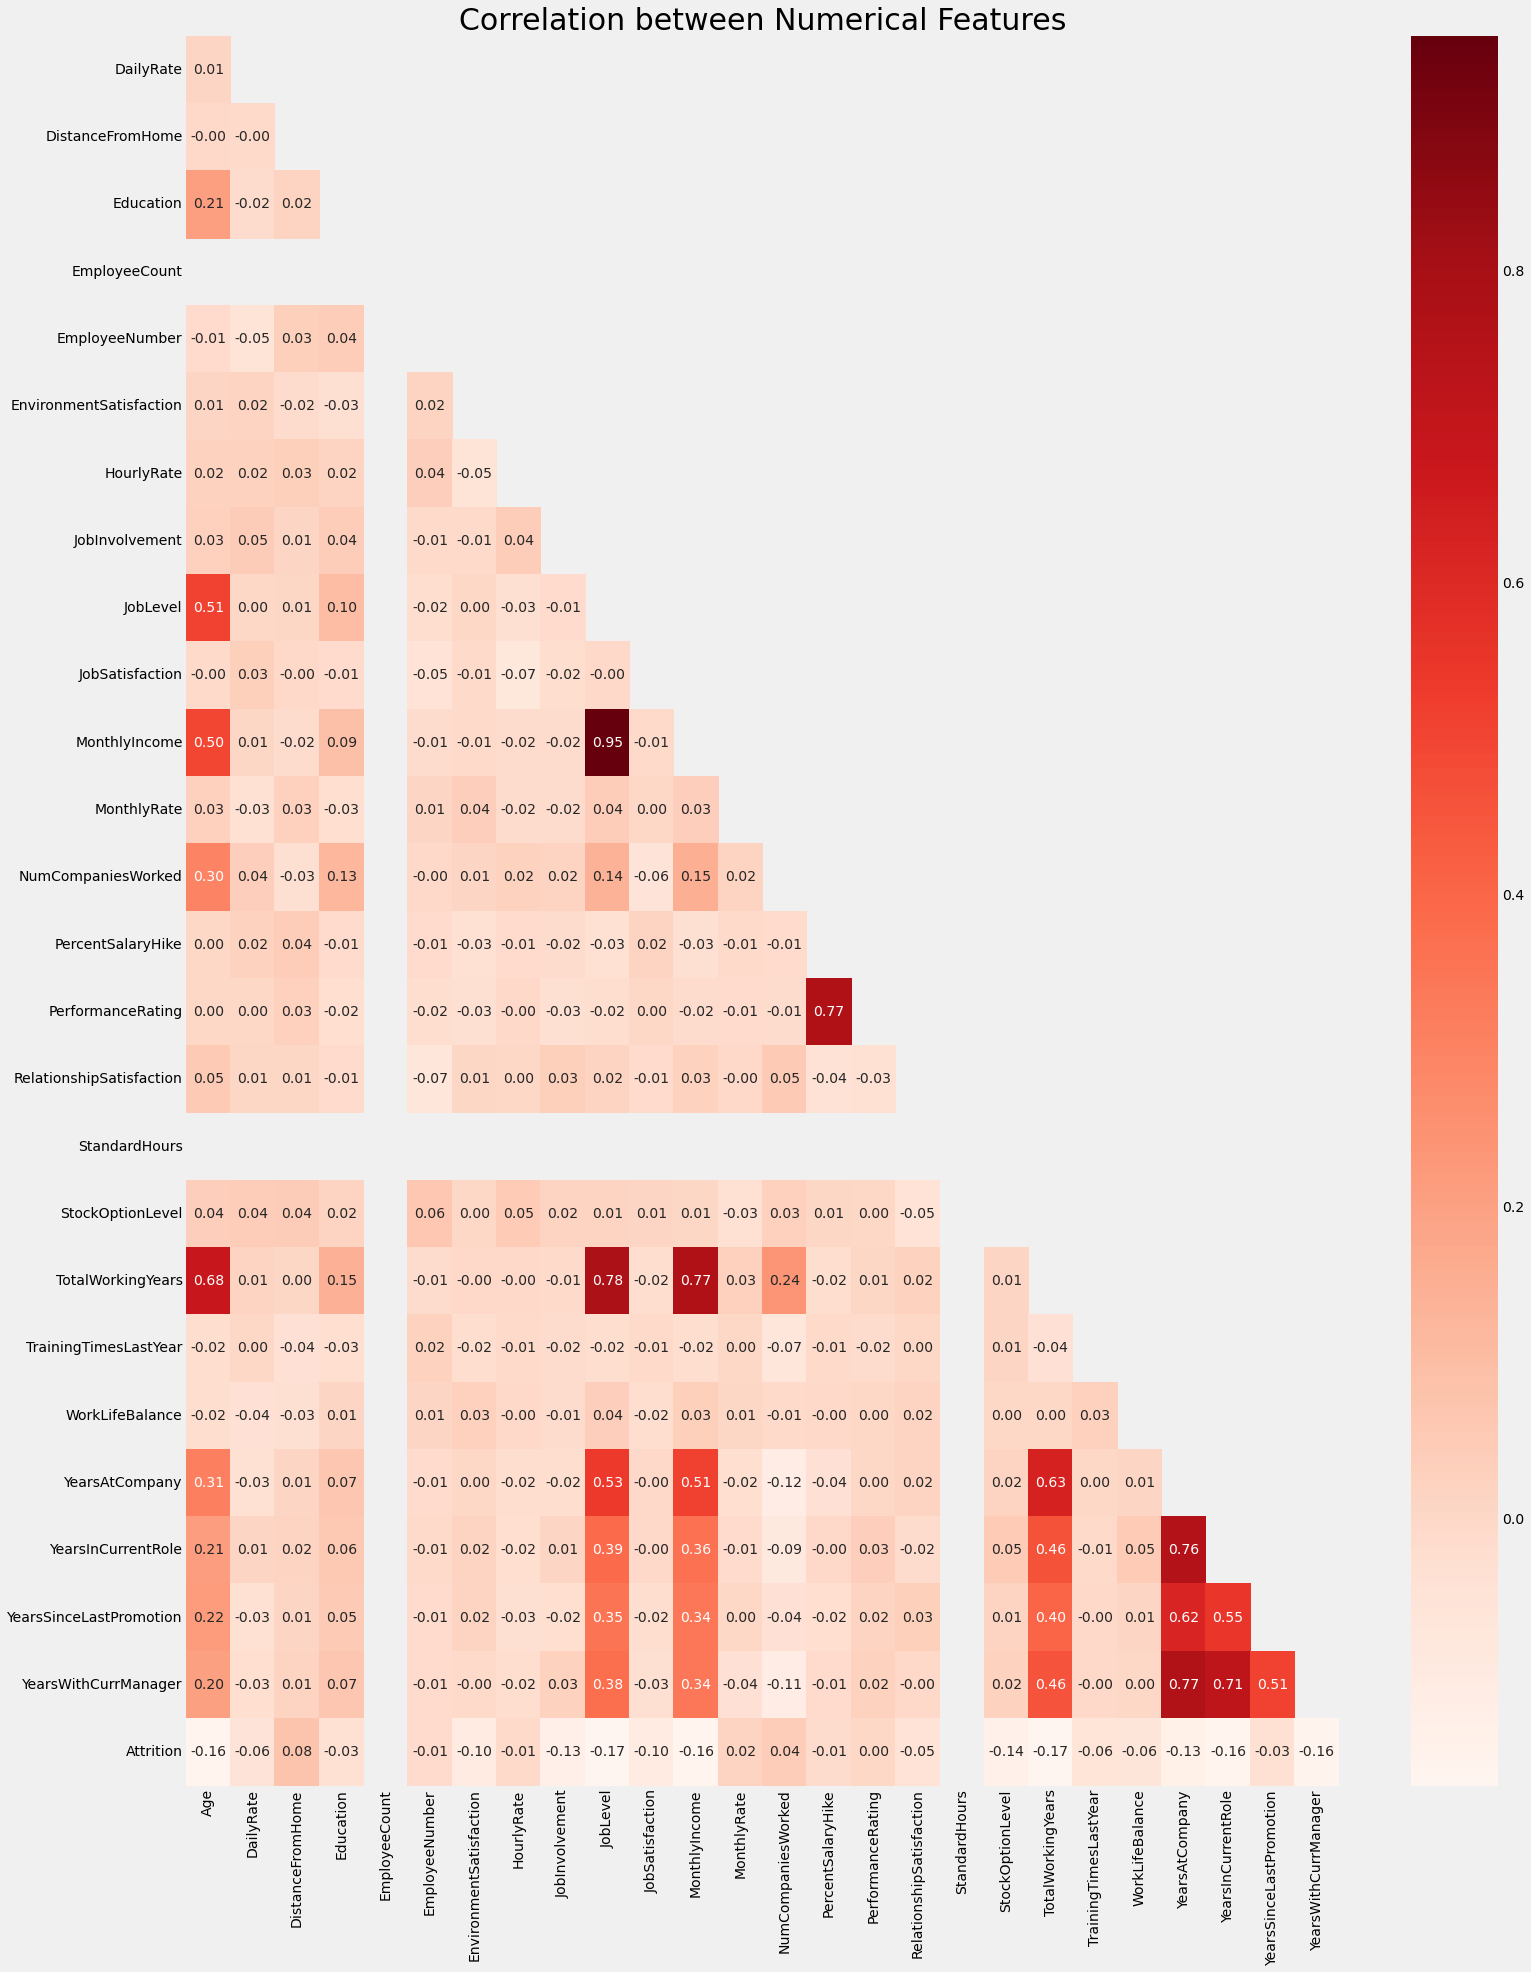

In [204]:
corr_ = df_corr[nums + ["Attrition"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns=['Attrition'], index = 'Age')

plt.figure(figsize = (23, 30))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.2f',
    cmap = 'Reds'
)
plt.title("Correlation between Numerical Features",fontsize=30)
plt.yticks(rotation=0)
plt.show()

- Antara kolom target dengan kesemua feature numerik cenderung memiliki tingkat korelasi yang rendah.
- Pada beberapa kolom, antar kolom memiliki korelasi yang cukup tinggi, seperti pada kolom `MonthlyIncome` dan `JobLevel`, `JobLevel` dan `TotalWorkingYears`. Kolom-kolom tersebut besar kemungkinan memiliki multikoleniaritas.
- Pada feature `EmployeeCount` dan `StandardHours` 

## Analysis Categorical Feature

In [205]:
cat_columns = df.select_dtypes('object').columns.to_list()

### Univariate Analysis

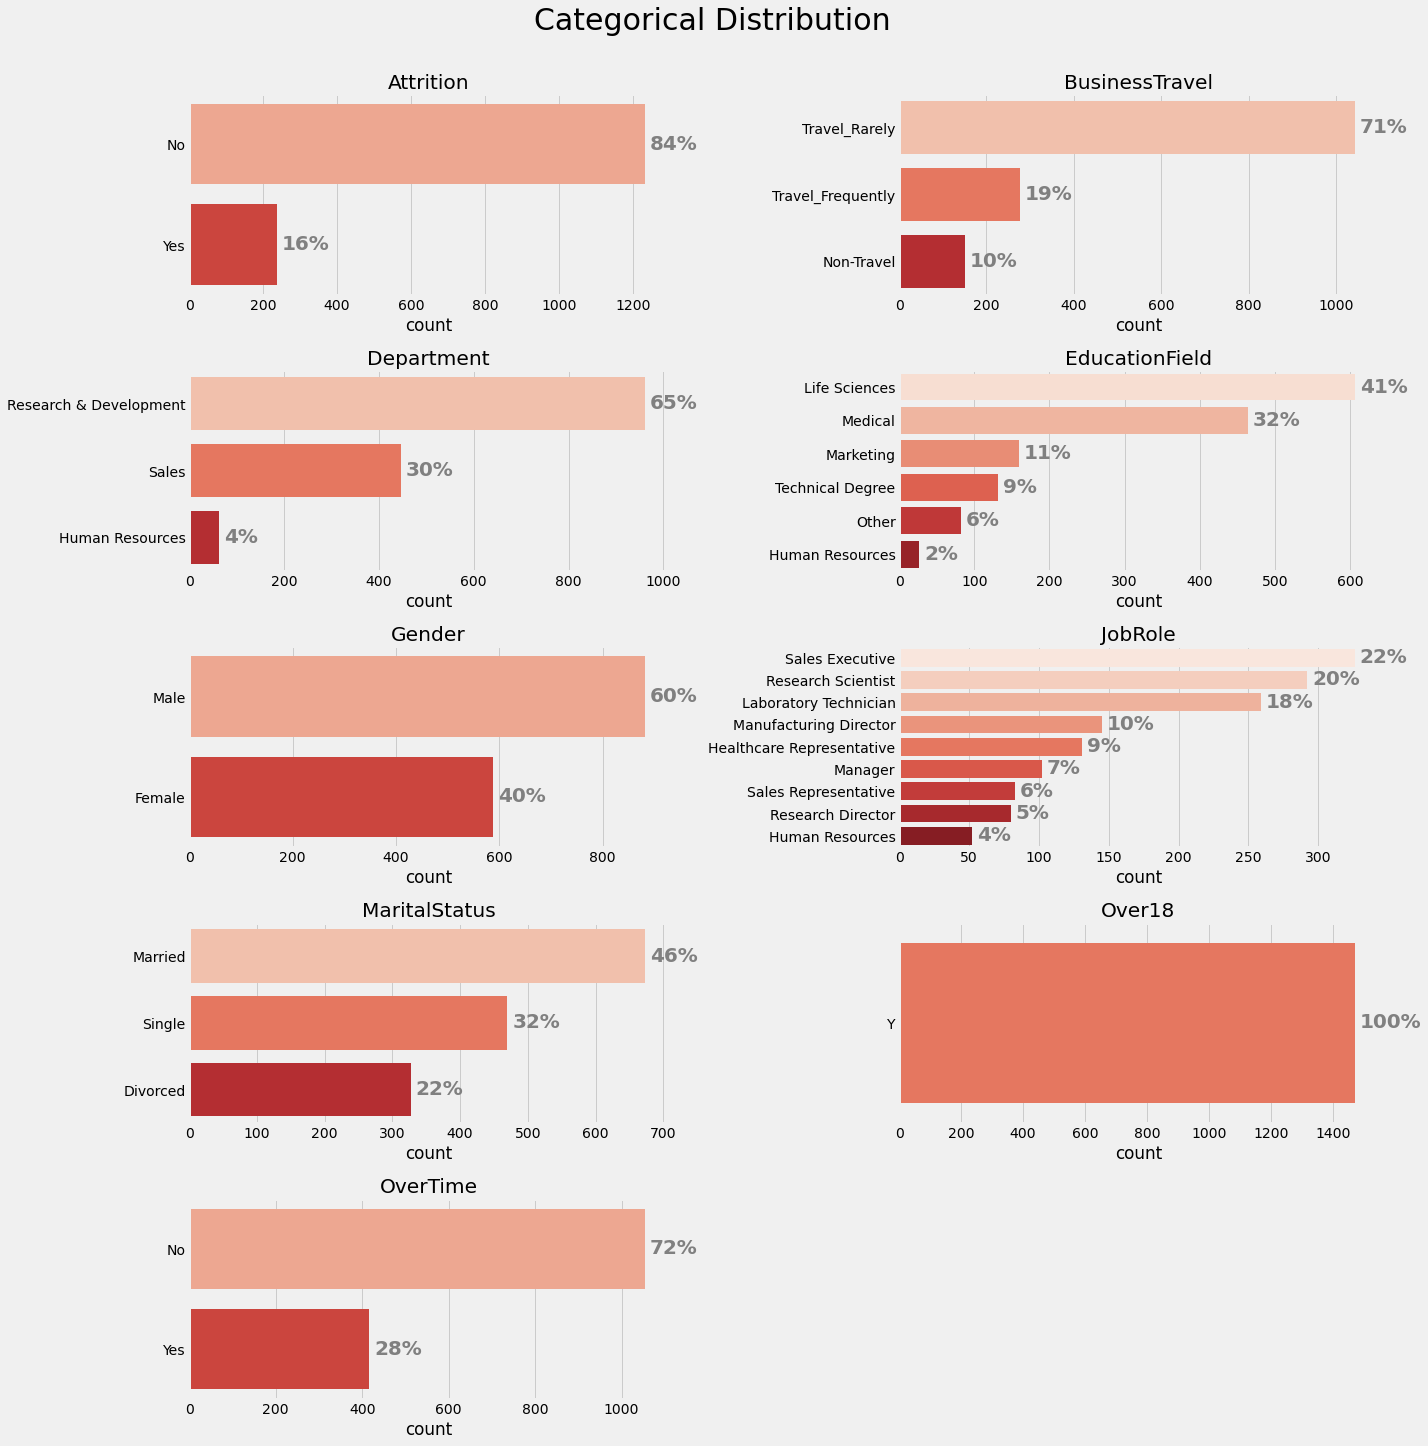

In [206]:
plt.figure(figsize=(20, 20))
plt.suptitle('Categorical Distribution', fontsize=30, y = 1.005)
for i in range(len(cat_columns)):
    plt.subplot(len(cat_columns)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_columns[i]], palette = 'Reds', order = df[cat_columns[i]].value_counts().index
    )
    ax.set_ylabel('')
    ax.set_title(cat_columns[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=20
        )
plt.tight_layout()
plt.show()

- Lebih dari `50%` pegawai berasal dari departemen `Research&Development`.
- Sebagain besar pegawai berstatus `Married`.
- `Sales Executive` merupakan job role dengan percentage pegawai terbanyak.
- Prosentase pegawai yang bekerja overtime mencapai `28%`.

### Multivariate Analysis

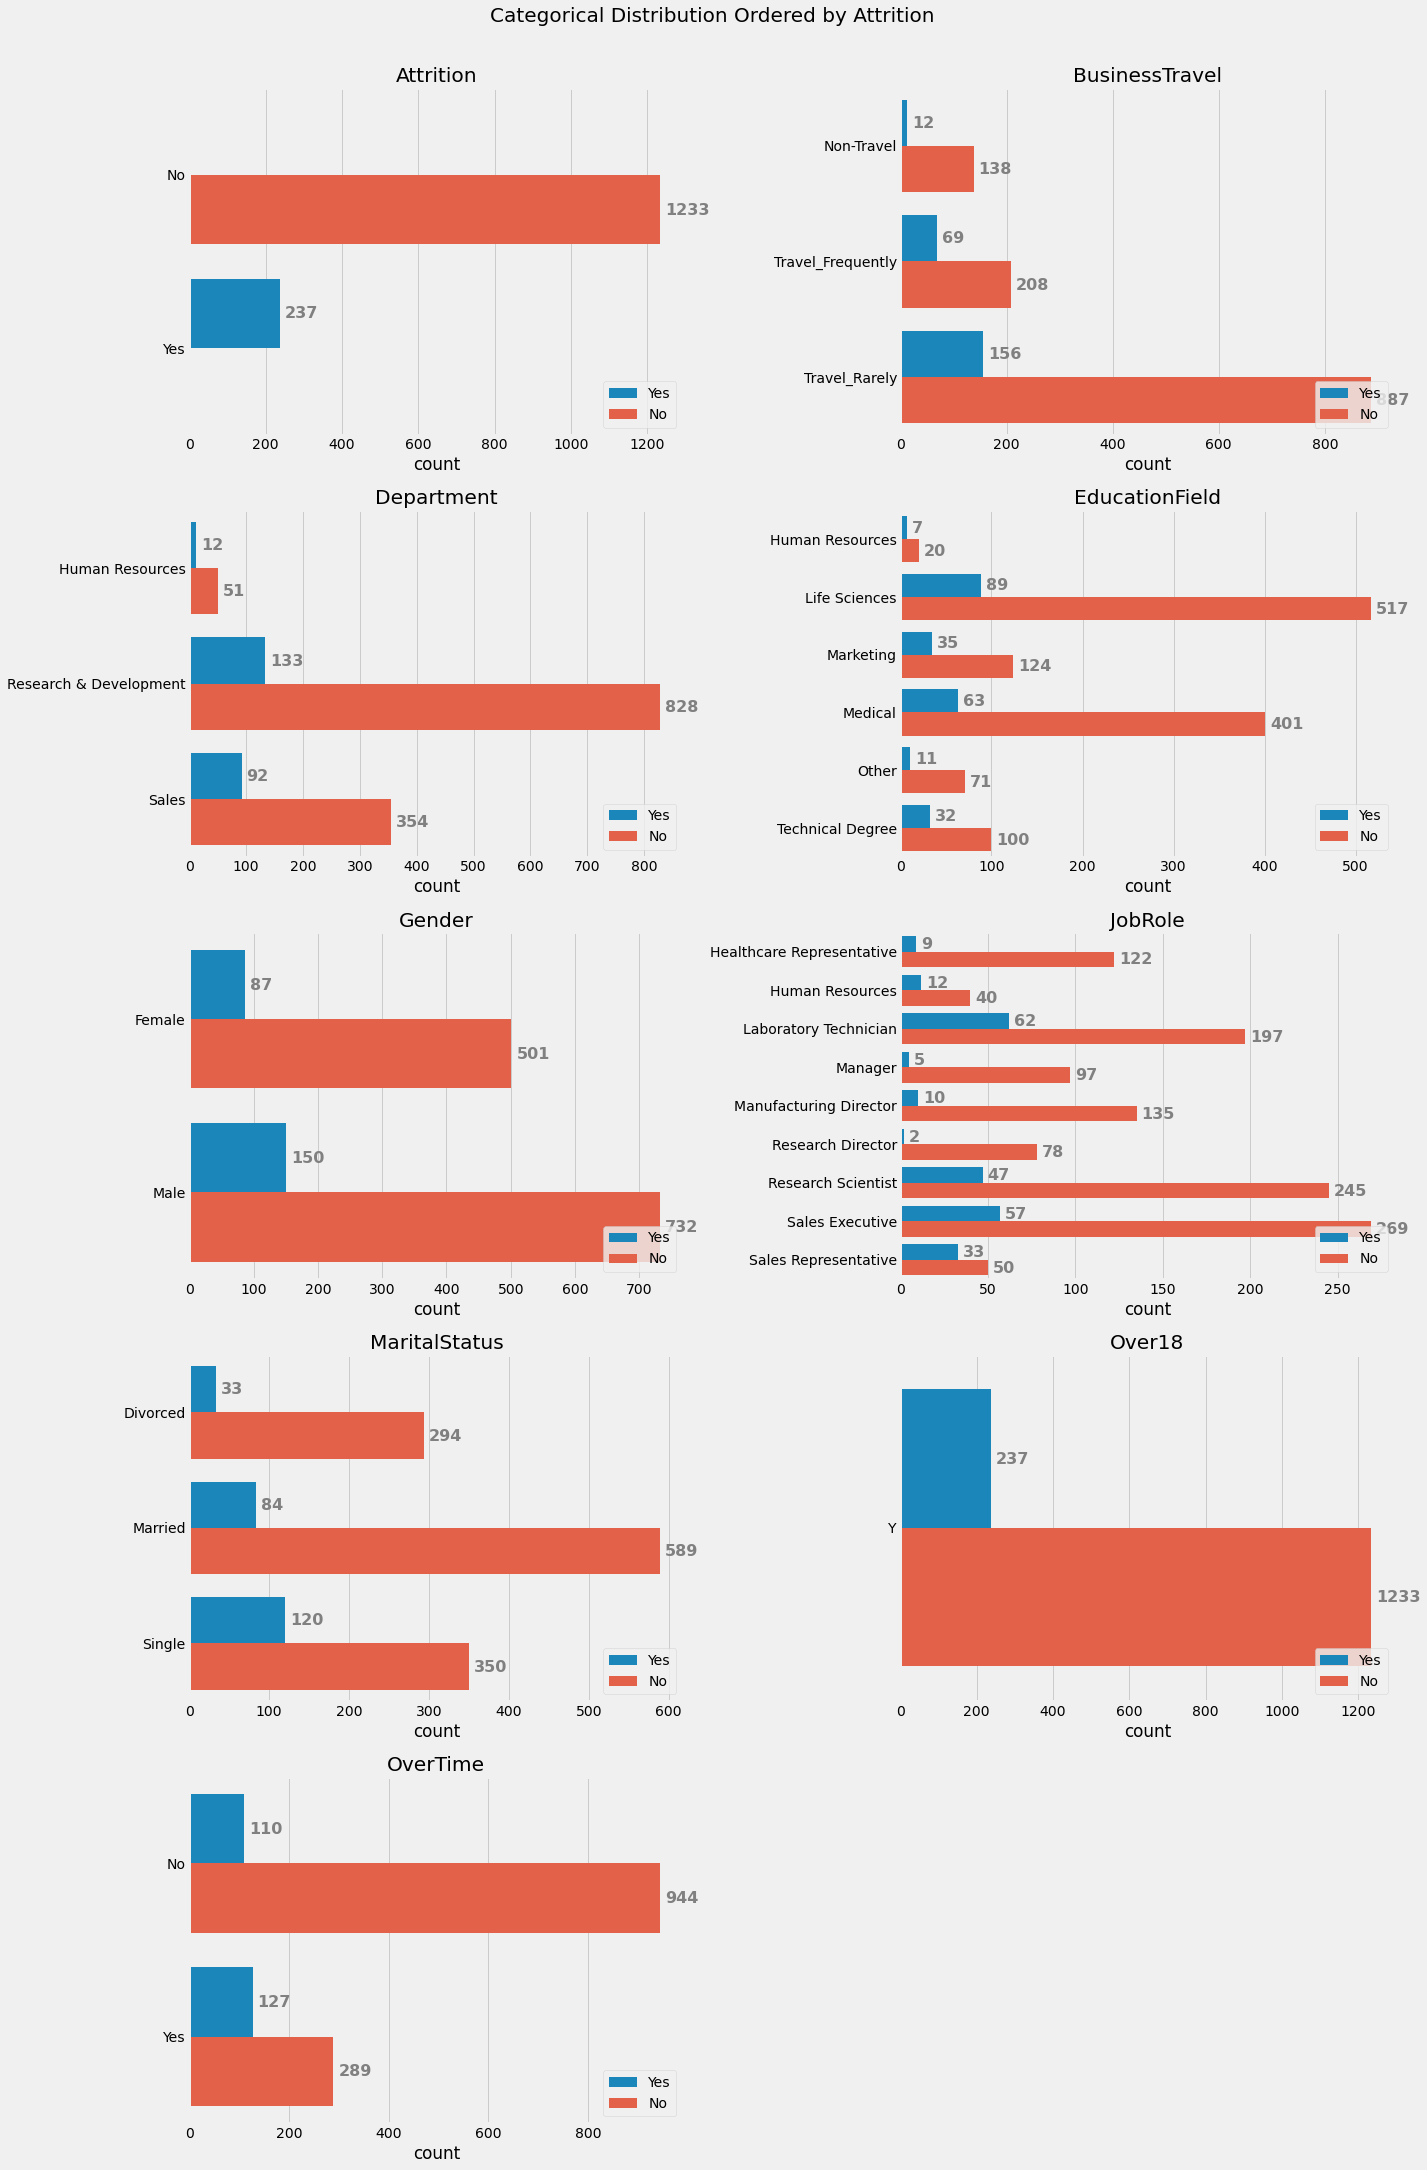

In [207]:
plt.figure(figsize=(20, 30))
plt.suptitle('Categorical Distribution Ordered by Attrition', fontsize=20, y = 1.005)
for i in range(len(cat_columns)):
    plt.subplot(len(cat_columns)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[cat_columns[i]], order = pd.crosstab(df[cat_columns[i]], df['Attrition']).index,
        hue = df['Attrition']
    )
    ax.set_ylabel('')
    ax.set_title(cat_columns[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=16
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

- Pegawai dengan status single lebih cenderung attrition daripada yang memiliki status married atau divorce.
- Begitupun dengan pegawai yang bekerja overtime lebih cenderung untuk attrition.
- JobRole dengan jumlah pegawai Attrition terbanyak adalah Laboratory technician dan Terendah adalah Research Director.

## More Insight

In [208]:
# function to plot proportion of y by categories
def proportion_attrition(column, legend_loc = 8, l= 8, t=4):
    plt.figure(figsize=(6,4))
    colors = ['#4D3425','#E4512B']
    contract_churn = df.groupby([column,'Attrition']).size().unstack()
    contract_churn

    ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                    width = 0.3,
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (l,t),
                                                                    color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc=legend_loc,prop={'size':14},title = 'Subscribed')
    ax.set_ylabel('% Customers',size = 14)
    ax.set_title('Subscribed by {}'.format(column),size = 14)

    # Code to add the data labels on the stacked bar chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)

#### diantara pegawai laki-laki dan perempuan siapakah yang lebih besar kemungkinannya untuk Attrition?

<Figure size 432x288 with 0 Axes>

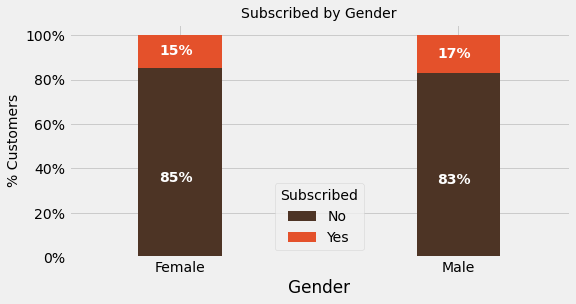

In [209]:
proportion_attrition('Gender')

Pegawai laki-laki sedikit lebih besar kemungkinannya dari pada perempuan. Selanjutnya dibawah ini kita bisa meilihat dari segi distribusi gaji tidak terlihat adanya perbedaan signifikan antara laki-laki dan perempuan.

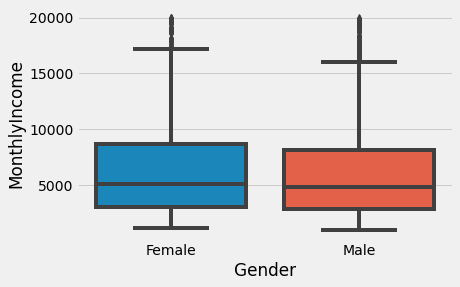

In [210]:
 ax = sns.boxplot(
        y = df['MonthlyIncome'],
        x = df['Gender'],
    )

#### Bagaimana pengaruh tingkat kepuasan pegawai pada  JobInvolvement, JobSatisfaction, WorkLifeBalnce dan RelationshipSatisfaction terhadap tingkat attrition?

<Figure size 432x288 with 0 Axes>

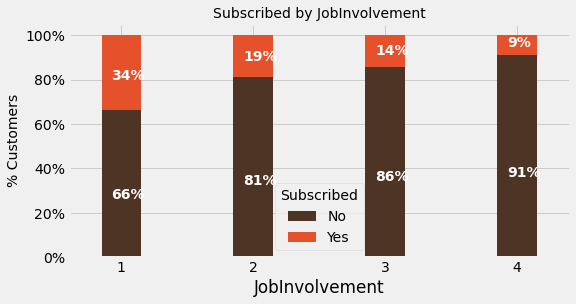

<Figure size 432x288 with 0 Axes>

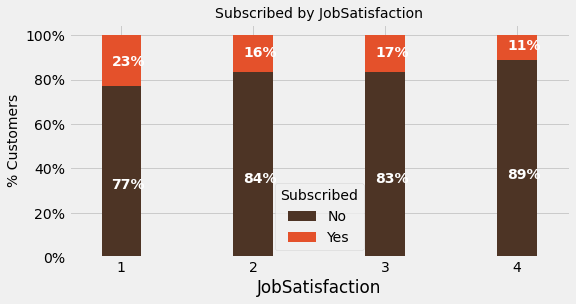

<Figure size 432x288 with 0 Axes>

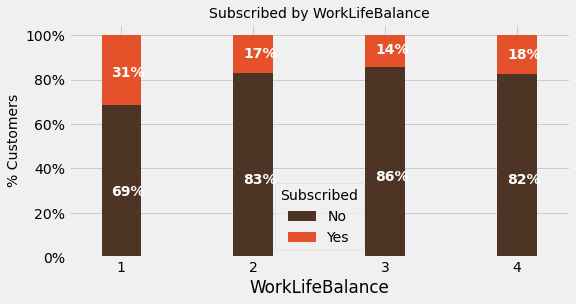

<Figure size 432x288 with 0 Axes>

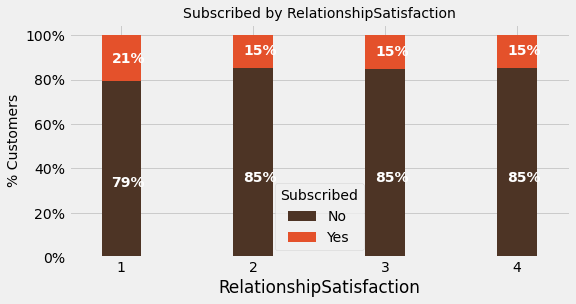

<Figure size 432x288 with 0 Axes>

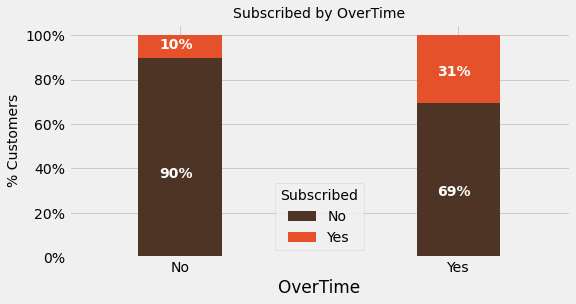

In [211]:
proportion_attrition('JobInvolvement')
proportion_attrition('JobSatisfaction')
proportion_attrition('WorkLifeBalance')
proportion_attrition('RelationshipSatisfaction')
proportion_attrition('OverTime')

Berdasarkan keempat informasi diatas dapat ditarik kesimpulan Ketika seorang pegawai tidak banyak dilibatkan dalam suatu project, kurang adanya worklifebalance, merasa tidak nyaman dengan pekerjaan yang dilakukan dan juga terhadap lingkungan kerjanya maka pegawai tersebut akan cenderung untuk meninggalkan perusahaan. WorkLifebalance berkaitan juga dengan overtime atau lembur, pegawai yang bekerja lembur lebih cenderung untuk meninggalkan perusahaan daripada yang bekerja dengan jam normal.

##### Bagaimana pengaruh PercentSalaryHike terhadap tingkat attrition pegawai

Pegawai dengan kenaikan gaji kurang dari `15%` lebih cenderung untuk meninggalkan perusahaan.

##### Bagaimana distribusi usia terhadap tingkat attrition?

Pegawai yang berada di usia sekitar 20 an hingga 30 tahun lebih cenderung untuk Attrition. 

## Target Column

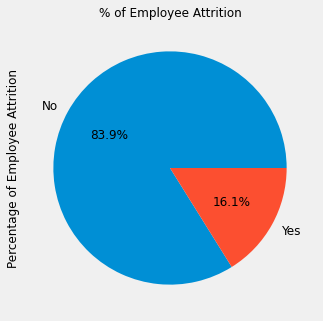

In [5]:
ax = (df['Attrition'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Percentage of Employee Attrition',fontsize = 12)
ax.set_title('% of Employee Attrition', fontsize = 12)
plt.savefig('imbalance.png')

Prosentase pada masing-masing value dari kolom target berbeda cukup signifikan, sekitar `1:5`. Sehingga bisa dikatakan bahwa kolom target bersifat imbalance. Untuk itu pada tahapan pre-processing nantinya akan dilakukan handling terhadap imbalance data menggunakan `SMOTE`.

# Data Pre-processing

In [215]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [216]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Feature Selection

Pada tahapan feature selection ini akan dilakukan uji multikoleniaritas menggunakan metode VIF (variance inflation factor). Metode ini bertujuan untuk mengatui apakah antar variabel independen memiliki korelasi. 

In [217]:
df_features = df.drop(columns=["Attrition"])

In [218]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,Age,2.044997
1,DailyRate,1.020863
2,DistanceFromHome,1.016514
3,Education,1.061247
4,EmployeeCount,0.000000
5,EmployeeNumber,1.019558
6,EnvironmentSatisfaction,1.010565
7,HourlyRate,1.019212
8,JobInvolvement,1.016367
9,JobLevel,11.208731


VIF dengan nilai lebih dari `10` ditemukan pada kolom `JobLevel` hal ini mengindikasikan bahwa kolom tersebut memiliki korelasi yang sangat besar dengan kolom lain, oleh karena itu kolom tersebut akan didrop.

In [219]:
df.drop(columns = ['MonthlyRate','HourlyRate','DailyRate','YearsInCurrentRole','PerformanceRating',
                   'StockOptionLevel','YearsWithCurrManager','EmployeeCount','StandardHours',
                   'JobLevel','Over18','EmployeeNumber'], inplace = True)

## Outlier Treatment

In [220]:
nums = df.select_dtypes(['int','float'])

In [221]:
for k, v in nums.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]

    print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column Attrition outliers = 100.00%
Column DistanceFromHome outliers = 0.00%
Column Education outliers = 0.00%
Column EnvironmentSatisfaction outliers = 0.00%
Column JobInvolvement outliers = 0.00%
Column JobSatisfaction outliers = 0.00%
Column MonthlyIncome outliers = 7.76%
Column NumCompaniesWorked outliers = 3.54%
Column PercentSalaryHike outliers = 0.00%
Column RelationshipSatisfaction outliers = 0.00%
Column TotalWorkingYears outliers = 4.29%
Column TrainingTimesLastYear outliers = 16.19%
Column WorkLifeBalance outliers = 0.00%
Column YearsAtCompany outliers = 7.96%
Column YearsSinceLastPromotion outliers = 7.28%


## Split Data

In [222]:
X = df.drop(columns="Attrition")
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 22), (294, 22), (1176,), (294,))

Split data dengan proporsi test size `0.2` dan menerapkan stratify.

## Pipeline for Pre-processing

In [223]:
nums = df.select_dtypes(include=['int','float']).drop(columns="Attrition").columns.to_list()

cats = df.select_dtypes(include=['object']).columns.to_list()

In [224]:
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, nums),
    ("categoric", categorical_pipeline, cats)
])

Mendefinisikan pipeline untuk pre-processing berdasarkan tipe data. Pada data dengan tipe numeric dilakukan scalling menggunakan StandardScaler dan pada data kategorikal diterapkan encoding menggunakan OneHotEncoder.

# Training and Evaluation model

## Define Function for Evaluation and Feature Importance

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def eval_classification(model, predtrain, predtest, xtrain, ytrain, xtest, ytest):
    d = {
         'Accuracy': [accuracy_score(ytrain, predtrain), accuracy_score(ytest, predtest)], 
         'Precision': [precision_score(ytrain, predtrain), precision_score(ytest, predtest)],
         'Recall': [recall_score(ytrain, predtrain), recall_score(ytest, predtest) ],
         'F1-score' : [f1_score(ytrain, predtrain), f1_score(ytest, predtest)]
        }
    result = pd.DataFrame(data=d, index=["Train", "Test"])
    return result

def roc_auc_evaluation(x_test, y_test, model):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label = '(area= %0.2f)' % auc(fpr,tpr))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc= 'lower right')
    plt.show()
    
def show_feature_importance(model):
    # feature_importances_ dari highest ke lowest
    sorted_idx = np.argsort(model.feature_importances_)
    print(sorted_idx)
    sorted_idx = sorted_idx[::-1]
    print(sorted_idx)

    # plot feature importances
    plt.figure(figsize=(12,6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[sorted_idx],
            color="r", align="center")
    plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

## Define Pipeline for Model

Pada tahap ini dibuat pipeline pada masing-masing algoritma dengan tahapan pertama pada pipeline adalah preprocessing yang pipelinenya sudah didefinisikan sebelumnya, dilanjutkan dengan handling imbalance menggunakan `SMOTE` kemudian terakhir ke tahap implementasi model.

In [226]:
# without handling imbalance
pipeline_logreg = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

pipeline_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

pipeline_svm = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500, probability=True))
])

pipeline_tree = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier())
])

pipeline_rfc = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

pipeline_xgboost = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

# with handling imbalance
pipeline_logreg_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', LogisticRegression())
])

pipeline_knn_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', KNeighborsClassifier())
])

pipeline_svm_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', SVC(max_iter=500, probability=True))
])

pipeline_tree_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', DecisionTreeClassifier())
])

pipeline_rfc_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', RandomForestClassifier())
])

pipeline_xgboost_imb = imbpipeline([
    ('prep', preprocessor),
    ('oversampling', SMOTE()),
    ('algo', XGBClassifier())
])

## Define Parameter for Tunning

Dibawah ini merupakan parameter-parameter yang akan ditunning pada tahapan HyperparameterTunning nanti. 

In [227]:
parameter_logreg = {
                  'algo__penalty': ['l2','elasticnet', 'none'],
                  'algo__C' : [0.001, 0.01, 0.1, 1],
                  'algo__solver': ['newton-cg', 'lbfgs', 'saga']
                }

parameter_rfc = {
                 'algo__max_depth': [20, 50, 80, 100],
                 'algo__max_features': [0.1, 0.3, 0.6, 0.8, 1],
                 'algo__min_samples_leaf': [1, 3, 5, 7, 10],
                }

parameter_knn = { 
                'algo__n_neighbors': [1,3,5,8,10],
                'algo__p':[1,2]
                }

parameter_xgb =  { 
                'algo__gamma' : [float(x) for x in np.linspace(0, 1, num = 5)],
                'algo__lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                'algo__alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                }

parameter_svm = {
                'algo__gamma': np.logspace(-2, 10, 3),
                'algo__C': np.logspace(-9, 3, 3)
                }

## Training Model

Pada tahapan training model ini pertama akan dilakukan training menggunakan base model. Pada training base model akan dilakukan dua kali pertama tanpa implementasi handling imbalance kedua dengan melakukan handling imbalance. Kemudian dilanjukan dengan melakukan hyperparameter tunning pada model. Pada tahapan hyperparameter tunning juga akan dilakukan training dua kali, pertama tanpa adanya handling imbalance kedua dengan melakukan handling imbalance menggunakan SMOTE. Training menggunakan base model bertujuan untuk dijadikan benchmark dan pembanding hasil evaluasi dengan model yang di tunning, selain itu penggunaan handling imbalance menggunakan SMOTE juga untuk mengetahui apakah evaluasi model mengalami perbaikan.

### Logistic Regression Base Model

#### Without Handling Imbalance

In [228]:
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

#### With Handling Imbalance

In [229]:
pipeline_logreg_imb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

### Logistic Regression with Tunning

#### Without Handling Imbalance

In [230]:
logreg_tunning = RandomizedSearchCV(pipeline_logreg, parameter_logreg, cv=5, n_jobs=-1, verbose=1)
logreg_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

#### With Handling Imbalance

In [231]:
logreg_tunning_imb = RandomizedSearchCV(pipeline_logreg_imb, parameter_logreg, cv=5, n_jobs=-1, verbose=1)
logreg_tunning_imb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/diakurnia/opt/mini

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

### KNN Base Model

#### Without handling imbalance

In [232]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

#### With Handling imbalance

In [233]:
pipeline_knn_imb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

### KNN with Tunning

#### Without Handling Imbalance

In [234]:
knn_tunning = RandomizedSearchCV(pipeline_knn, parameter_knn, cv=3)
knn_tunning.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

#### With Handling Imbalance

In [235]:
knn_tunning_imb = RandomizedSearchCV(pipeline_knn_imb, parameter_knn, cv=3)
knn_tunning_imb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

### SVM Base Model

#### Without Handling imbalance

In [236]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

#### With Handling Imbalance

In [237]:
pipeline_svm_imb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

### SVM Tunning

#### Without Handling Imbalance

In [238]:
svm_tunning = RandomizedSearchCV(pipeline_svm, parameter_svm, cv=3, n_jobs=-1, verbose=1)
svm_tunning.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

#### With Handling Imbalance

In [239]:
svm_tunning_imb = RandomizedSearchCV(pipeline_svm_imb, parameter_svm, cv=3, n_jobs=-1, verbose=1)
svm_tunning_imb.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/diakurnia/opt/miniconda3/lib/python3.9/site-packages/

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

### Random Forest Base Model

#### Without handling imbalance

In [240]:
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

#### With Handling imbalance

In [241]:
pipeline_rfc_imb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

### Random Forest with Tunning

#### Without handling imbalance

In [242]:
rfc_tunning = RandomizedSearchCV(pipeline_rfc, parameter_rfc, cv=5, n_jobs=-1, verbose=1)
rfc_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

#### With Handling imbalance

In [243]:
rfc_tunning_imb = RandomizedSearchCV(pipeline_rfc_imb, parameter_rfc, cv=5, n_jobs=-1, verbose=1)
rfc_tunning_imb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

### XG-boost Base Model

#### Without Handling Imbalance

In [244]:
pipeline_xgboost.fit(X_train, y_train)

[15:59:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

#### With Handling Imbalance

In [245]:
pipeline_xgboost_imb.fit(X_train, y_train)

[15:59:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                          

### XG-boost with Tunning

#### Without Handling Imbalance

In [246]:
xgb_tunning = RandomizedSearchCV(pipeline_xgboost, parameter_xgb, cv=5)
xgb_tunning.fit(X_train, y_train)

[15:59:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:59:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

#### With Handling Imbalance

In [247]:
xgb_tunning_imb = RandomizedSearchCV(pipeline_xgboost_imb, parameter_xgb, cv=5)
xgb_tunning_imb.fit(X_train, y_train)

[15:59:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:59:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'DistanceFromHome',
                                                                                'Education',
                                                                                'EnvironmentSatisfaction',
                                                                                'JobInvolvement',
                                                                                'JobSatisfaction',
                        

## Model Evaluation

In [248]:
def evaluation(base_model, base_model_imb, tunning_model, tunning_model_imb, model):
    # without tunning
    y_pred_train = base_model.predict(X_train)
    y_pred_test = base_model.predict(X_test)
    print('{} Base Model Evaluation'.format(model))
    print(eval_classification(base_model, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test))
    print('\n')

    # without tunning with SMOTE
    y_pred_train = base_model_imb.predict(X_train)
    y_pred_test = base_model_imb.predict(X_test)
    print('{} Base Model Evaluation With SMOTE'.format(model))
    print(eval_classification(base_model_imb, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test))
    print('\n')

    # with tunning
    y_pred_train = tunning_model.predict(X_train)
    y_pred_test = tunning_model.predict(X_test)
    print('{} Tunning Model Evaluation'.format(model))
    print(eval_classification(tunning_model, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test))
    print('\n')

    # with tunning with SMOTE
    y_pred_train = tunning_model_imb.predict(X_train)
    y_pred_test = tunning_model_imb.predict(X_test)
    print('{} Tunning Model Evaluation with SMOTE'.format(model))
    print(eval_classification(tunning_model_imb, y_pred_train, y_pred_test, X_train, y_train, X_test, y_test))


#### Feature Importance

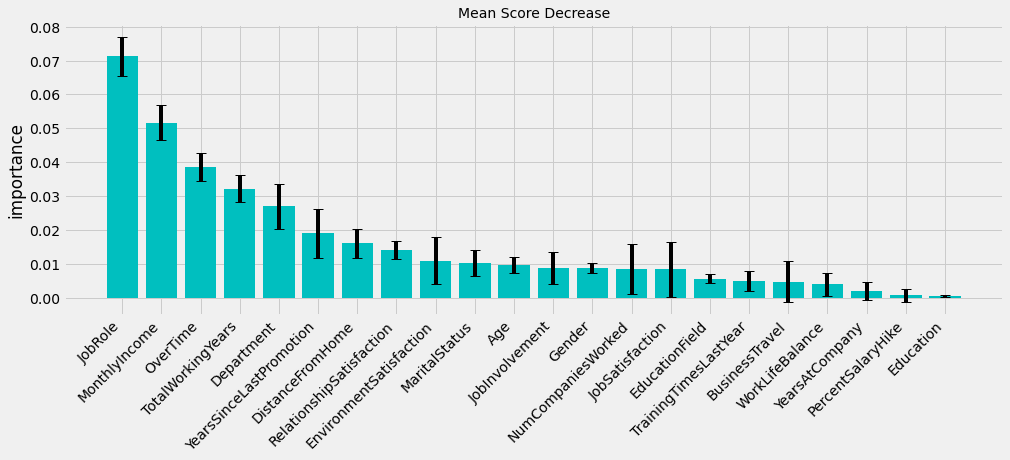

In [289]:
df_imp = mean_score_decrease(X_train, y_train, logreg_tunning_imb, plot=True, topk=25)

### Logistic Regression

In [249]:
evaluation(pipeline_logreg, pipeline_logreg_imb, logreg_tunning, logreg_tunning_imb, 'Logistic Regression')

print('\n')
# Access the best set of parameters with SMOTE
best_pipe_logreg = logreg_tunning.best_estimator_
best_params_logreg = logreg_tunning.best_params_
print('Best Parameter :\n', best_params_logreg)
# Access the best set of parameters with SMOTE
print('\n')
best_pipe_logreg_imb = logreg_tunning_imb.best_estimator_
best_params_logreg_imb = logreg_tunning_imb.best_params_
print('Best Parameter :\n', best_params_logreg_imb)

Logistic Regression Base Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.892007   0.811881  0.431579  0.563574
Test   0.877551   0.720000  0.382979  0.500000


Logistic Regression Base Model Evaluation With SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.785714   0.414365  0.789474  0.543478
Test   0.785714   0.394737  0.638298  0.487805


Logistic Regression Tunning Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.889456   0.916667  0.347368  0.503817
Test   0.884354   0.842105  0.340426  0.484848


Logistic Regression Tunning Model Evaluation with SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.798469   0.432665  0.794737  0.560297
Test   0.782313   0.380282  0.574468  0.457627


Best Parameter :
 {'algo__solver': 'lbfgs', 'algo__penalty': 'l2', 'algo__C': 0.1}


Best Parameter :
 {'algo__solver': 'newton-cg', 'algo__penalty': 'none', 'algo__C': 0.01}


Berikut beberapa kesimpulan yang dapat ditarik dari hasil evaluasi model logistic regression
- Ketika dataset memiliki karakteristik imbalance salah satu matrics yang perlu diperhatikan adalah `f1-score`, dari perbandingan antara model yang dilakukan handling imbalance dengan yang tanpa dilakukan handling imbalance, tampak bahwa `f1-score` mengalami peningkatan setelah dilakukan handling terhadap imbalance. 
- Pada data yang telah dilakukan handling imbalance, antara base model dengan model yang telah di tunning menunjukkan bahwa evaluasi pada matrics accuracy, precision dan f1-score mengalami peningkatan. Sedangkan pada matrics accuracy nilainya tetap.
- Berdasarkan hasil perbanding diatas dengan memperhatikan matrics f1-score, pada model Logistic Regression menunjukkan evaluasi matriks terbaik terdapat pada model yang dilakukan handling imbalance dan telah di tunning.

### KNN

In [250]:
evaluation(pipeline_knn, pipeline_knn_imb, knn_tunning, knn_tunning_imb, 'KNN')

# Access the best set of parameters with SMOTE
print('\n')
best_pipe_knn = knn_tunning.best_estimator_
best_params_knn = knn_tunning.best_params_
print('Best Parameter :\n', best_params_knn)

print('\n')
# Access the best set of parameters with SMOTE
best_pipe_knn_imb = knn_tunning_imb.best_estimator_
best_params_knn_imb = knn_tunning_imb.best_params_
print('Best Parameter with SMOTE :\n', best_params_knn_imb)


KNN Base Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.876701   0.924528  0.257895  0.403292
Test   0.840136   0.500000  0.106383  0.175439


KNN Base Model Evaluation With SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.788265   0.431871  0.984211  0.600321
Test   0.598639   0.224806  0.617021  0.329545


KNN Tunning Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.880102   0.901639  0.289474  0.438247
Test   0.846939   0.625000  0.106383  0.181818


KNN Tunning Model Evaluation with SMOTE
       Accuracy  Precision    Recall  F1-score
Train  1.000000   1.000000  1.000000  1.000000
Test   0.789116   0.317073  0.276596  0.295455


Best Parameter :
 {'algo__p': 1, 'algo__n_neighbors': 5}


Best Parameter with SMOTE :
 {'algo__p': 1, 'algo__n_neighbors': 1}


Berikut beberapa kesimpulan yang dapat ditarik dari hasil evaluasi model KNN,
- Perbandingan antara model yang dilakukan handling imbalance dengan yang tanpa dilakukan handling imbalance, tampak bahwa `f1-score` mengalami peningkatan setelah dilakukan handling terhadap imbalance. 
- Pada data yang telah dilakukan handling imbalance, antara base model dengan model yang telah di tunning menunjukkan bahwa evaluasi pada matrics accuracy dan precision mengalami peningkatan setelah ditunning, sedangkan pada matrics f1-score dan recall mengalami penurunan.

### SVM

In [251]:
evaluation(pipeline_svm, pipeline_svm_imb, svm_tunning, svm_tunning_imb, 'SVM')

# Access the best set of parameters
best_pipe_svm = svm_tunning.best_estimator_
best_params_svm = svm_tunning.best_params_
print('Best Parameter :\n', best_params_svm)

print('\n')
# Access the best set of parameters with SMOTE
best_pipe_svm_imb = svm_tunning_imb.best_estimator_
best_params_svm_imb = svm_tunning_imb.best_params_
print('Best Parameter with SMOTE :\n', best_params_svm_imb)


SVM Base Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.919218   0.979798  0.510526  0.671280
Test   0.863946   0.818182  0.191489  0.310345


SVM Base Model Evaluation With SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.957483   0.839806  0.910526  0.873737
Test   0.843537   0.512821  0.425532  0.465116


SVM Tunning Model Evaluation
       Accuracy  Precision  Recall  F1-score
Train  0.838435        0.0     0.0       0.0
Test   0.840136        0.0     0.0       0.0


SVM Tunning Model Evaluation with SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.852891        1.0  0.089474  0.164251
Test   0.840136        0.0  0.000000  0.000000
Best Parameter :
 {'algo__gamma': 0.01, 'algo__C': 1e-09}


Best Parameter with SMOTE :
 {'algo__gamma': 10000.0, 'algo__C': 1000.0}


Berikut beberapa kesimpulan yang dapat ditarik dari hasil evaluasi model KNN,
- Perbandingan antara model yang dilakukan handling imbalance dengan yang tanpa dilakukan handling imbalance, tampak bahwa `f1-score` mengalami peningkatan setelah dilakukan handling terhadap imbalance. 
- Pada data yang telah dilakukan handling imbalance, antara base model dengan model yang telah di tunning menunjukkan bahwa evaluasi pada matrics accuracy dan precision mengalami peningkatan setelah ditunning, sedangkan pada matrics f1-score dan recall mengalami penurunan.

### Random Forest Classifier

In [252]:
evaluation(pipeline_rfc, pipeline_rfc_imb, rfc_tunning, rfc_tunning_imb, 'RFC')

# Access the best set of parameters
best_pipe_rfc = rfc_tunning.best_estimator_
best_params_rfc = rfc_tunning.best_params_
print('Best Parameter :\n', best_params_rfc)

print('\n')
# Access the best set of parameters with SMOTE
best_pipe_rfc_imb = rfc_tunning_imb.best_estimator_
best_params_rfc_imb = rfc_tunning_imb.best_params_
print('Best Parameter with SMOTE :\n', best_params_rfc_imb)


RFC Base Model Evaluation
       Accuracy  Precision   Recall  F1-score
Train   1.00000   1.000000  1.00000  1.000000
Test    0.85034   0.666667  0.12766  0.214286


RFC Base Model Evaluation With SMOTE
       Accuracy  Precision    Recall  F1-score
Train   1.00000   1.000000  1.000000  1.000000
Test    0.85034   0.571429  0.255319  0.352941


RFC Tunning Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  0.892007   0.943662  0.352632   0.51341
Test   0.836735   0.461538  0.127660   0.20000


RFC Tunning Model Evaluation with SMOTE
       Accuracy  Precision    Recall  F1-score
Train  0.934524   0.918519  0.652632  0.763077
Test   0.863946   0.612903  0.404255  0.487179
Best Parameter :
 {'algo__min_samples_leaf': 7, 'algo__max_features': 0.3, 'algo__max_depth': 80}


Best Parameter with SMOTE :
 {'algo__min_samples_leaf': 7, 'algo__max_features': 0.1, 'algo__max_depth': 100}


Berikut beberapa kesimpulan yang dapat ditarik dari hasil evaluasi model Random Forest,
- Keseluruhan model menunjukkan adanya overfit terhadap data trin
- Hasil evaluasi f1-score mengalami peningkatan pada model dengan handling imbalance.
- Pada model yang telah dilakukan handling imbalance, antara base model dengan model yang dituning menunjukkan keseluruhan evaluasi data test pada base model lebih tinggi nilai nya daripada model yang telah di tunning.

### XG-boost

In [253]:
evaluation(pipeline_xgboost, pipeline_xgboost_imb, xgb_tunning, xgb_tunning_imb, 'RFC')

# Access the best set of parameters
best_pipe_xgb = xgb_tunning.best_estimator_
best_params_xgb = xgb_tunning.best_params_
print('Best Parameter :\n', best_params_xgb)

print('\n')
# Access the best set of parameters with SMOTE
best_pipe_xgb_imb = xgb_tunning_imb.best_estimator_
best_params_xgb_imb = xgb_tunning_imb.best_params_
print('Best Parameter with SMOTE :\n', best_params_xgb_imb)


RFC Base Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train  1.000000   1.000000  1.000000  1.000000
Test   0.860544   0.636364  0.297872  0.405797


RFC Base Model Evaluation With SMOTE
       Accuracy  Precision    Recall  F1-score
Train  1.000000   1.000000  1.000000  1.000000
Test   0.860544   0.615385  0.340426  0.438356


RFC Tunning Model Evaluation
       Accuracy  Precision    Recall  F1-score
Train   1.00000   1.000000  1.000000  1.000000
Test    0.85034   0.565217  0.276596  0.371429


RFC Tunning Model Evaluation with SMOTE
       Accuracy  Precision    Recall  F1-score
Train  1.000000   1.000000  1.000000  1.000000
Test   0.860544   0.615385  0.340426  0.438356
Best Parameter :
 {'algo__lambda': 0.0, 'algo__gamma': 0.25, 'algo__alpha': 0.75}


Best Parameter with SMOTE :
 {'algo__lambda': 1.0, 'algo__gamma': 0.0, 'algo__alpha': 0.5}


Berikut beberapa kesimpulan yang dapat ditarik dari hasil evaluasi model XG-boost,
- Pada base model evaluasi f1-score pada model yang menerapkan handling imbalance mengalami peningkatan nilai evaluasi dibandingkan sebelum dilakukan handling imbalance.
- Dengan mempertimbangkan keseluruhan matrics evaluasi pada model xg-boost hasil terbaik diperoleh pada base model xg-boost yang telah dilakukan handling imbalance menggunakan SMOTE.

## Summary Evaluation

In [254]:
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, recall_score

models = {
    'Logistic Regression':pipeline_logreg_imb,
    'SVM':pipeline_svm_imb,
    'Random Forest':pipeline_rfc_imb,
    'KNN':best_pipe_knn_imb,
    'XG-Boost':pipeline_xgboost_imb,
}

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1-score':f1_score,
}

df_model = pd.DataFrame(columns=models.keys(), index=['accuracy', 'f1-score'])
df_model.index.name='Metrics'

for metric in metrics.keys():
    for model in models.keys():
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [255]:
df_model

,Logistic Regression,SVM,Random Forest,KNN,XG-Boost
Metrics,,,,,
accuracy,0.785714,0.843537,0.85034,0.789116,0.860544
f1-score,0.487805,0.465116,0.352941,0.295455,0.438356
precision,0.394737,0.512821,0.571429,0.317073,0.615385
recall,0.638298,0.425532,0.255319,0.276596,0.340426


In [256]:
def evaluation_comparation(eval, save_image):
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x ='index', y=eval, data=df_model.T.reset_index(), palette = 'rocket' )
    x_offset = -0.03
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:.3f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.title('{} Evaluation'.format(eval),
             loc='center', pad=10, fontsize=15, color='brown')
    plt.ylabel('Probability')
    plt.xlabel('Model Name')
    plt.savefig(save_image)

(None,)

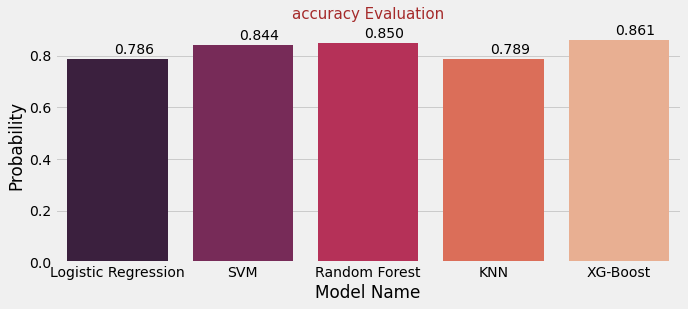

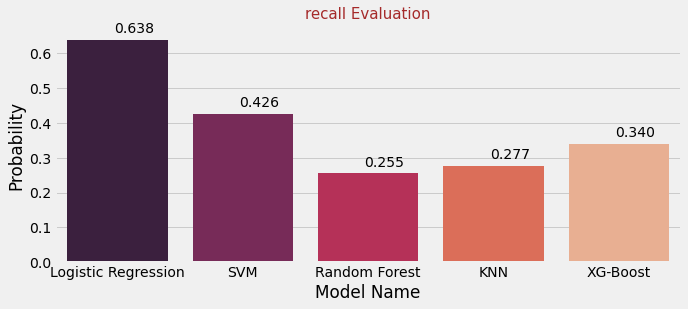

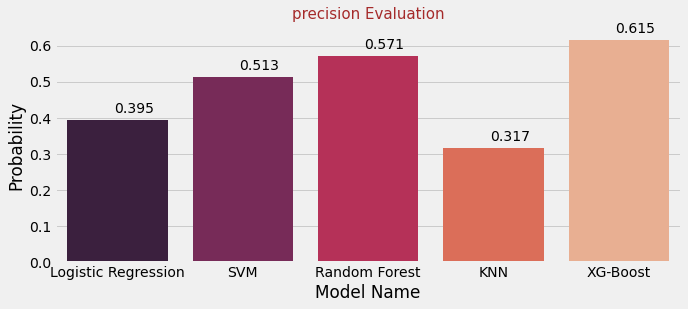

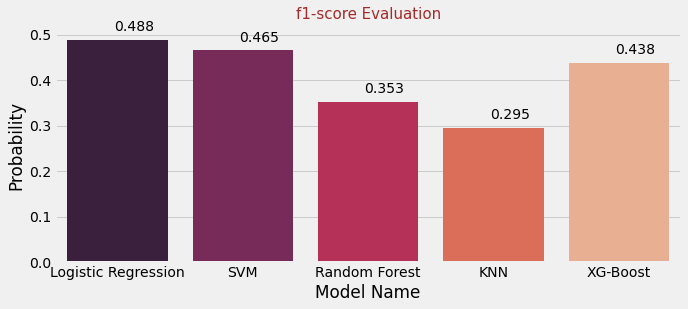

In [257]:
evaluation_comparation('accuracy','accuracy.png'), 
evaluation_comparation('recall','recall.png'),
evaluation_comparation('precision','precision.png'),
evaluation_comparation('f1-score','f1-score.png'),

- Matrics accuracy terbaik terdapat pada model xg-boost tanpa hyperparameter tunning atau dengan kata lain merupakan base model.
- Matrics recall terbaik terdapat pada base model logistic regression.
- matrics precision terbaik ditemukan pada model xg-boost dengan nilai precision `0.77` atau `77%`.
- f1-score tertinggi terdapat pada model Logistic Regression.
- Pada kasus ini model yang akan di pilih untuk selanjutnya ke tahapan deployment adalah model dengan matrics `Recall` dan `F1-score` tertinggi,  matrics tersebut dipilih karena  data yang dimiliki bersifat imbalance sehingga kurang tepat jika kita menggunakan matrics accuracy meskipun hasil dari matrics tersebut cukup bagus, selain itu dengan menggunakan matrics recall kita bisa meminimalisir kondisi False Negatif dalam kasus ini yaitu meminimalisis kesalahan prediksi pada pegawai yang seharusnya Atrrition diprediksi tidak Attrition. Dalam hal ini model yang akan digunakan adalah `Logistic Regression`.

# Save Model

In [284]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1194 to 1292
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   Department                1176 non-null   object
 3   DistanceFromHome          1176 non-null   int64 
 4   Education                 1176 non-null   int64 
 5   EducationField            1176 non-null   object
 6   EnvironmentSatisfaction   1176 non-null   int64 
 7   Gender                    1176 non-null   object
 8   JobInvolvement            1176 non-null   int64 
 9   JobRole                   1176 non-null   object
 10  JobSatisfaction           1176 non-null   int64 
 11  MaritalStatus             1176 non-null   object
 12  MonthlyIncome             1176 non-null   int64 
 13  NumCompaniesWorked        1176 non-null   int64 
 14  OverTime             

In [286]:
model_logreg = pipeline_logreg

Simpan model untuk nanti digunkan pada tahap deployment.


In [287]:
with open("model_logreg.pkl","wb") as filename:
    pickle.dump(model_logreg, filename)

# Model Inference

In [70]:
x = [[
    41, 'Travel_Rarely', 1102, 'Sales', 1, 2, 'Life Sciences', 2, 'Female', 94, 3, 'Sales Executive', 4, 'Single', 5993, 19479, 8, 'Yes',11,3,1,0,8,0,1,6,4,0,5
]]

In [71]:
data = pd.DataFrame(x, columns = X.columns)

In [72]:
model_logreg.predict(data)

array([1])

# Conclusion

- Dataset yang digunakan pada project ini berisi informasi terkait pegawai disuatu perusahaan, terdapat 34 kolom dan 1470 baris, dengan satu kolom target yaitu Attrition yang merepresentasikan apakah pegawai akan meninggalkan perusahan atau tidak. Tujuan dari pengerjaan project untuk mengetahui faktor-faktor yang menyebabkan seorang pegawai meninggalkan perusaahan dan melakukan prediksi menggunakan model klasifikasi. Dataset yang digunakan bersumber dari kaggle <a href='https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset'>HR Attrition</a>
- Matrics Evaluasi yang digunakan dalam analisis model adalah matrics Recall dan F1-score. Kedua matrics tersebut dipilih karena data bersifat imbalance dan dalam kasus ini kita inging meminimalisir kasus False negative. 
- Hasil komparasi dari keseluruhan model, matrics f1-score dan recall terbaik terdapat pada base model Logistic Regression yaitu `42%` dan `50%`. 